In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imageio import imread
import sys

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *
from stat_tools import *

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
np.max(X)

X shape =  (70000, 784)
y shape =  (70000,)


1.0

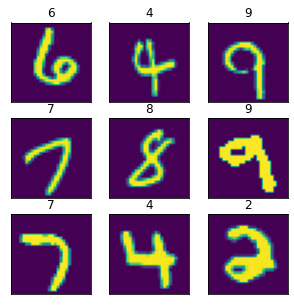

In [3]:
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


In [5]:
# Preprocess Y for our NN
y_train_onehot = np.zeros([len(y_train), 10])
y_test_onehot = np.zeros([len(y_test), 10])

for i, num in enumerate(y_train):
    y_train_onehot[i, int(num)] = 1
    
for i, num in enumerate(y_test):
    y_test_onehot[i, int(num)] = 1    

In [9]:
FFNN = FeedForwardNeuralNetwork(
    X=X_train,
    Y=y_train_onehot,
    cost=CostFunctions.CrossEntropy,
    activation=ActivationFunctions.ReLU,
    activation_out=ActivationFunctions.Softmax,
    network_shape=[30]
)

In [10]:
FFNN.train(int(len(y_train) / 32), 0.0001, 100)

In [11]:
y_pred = FFNN.predict(X_test)

In [ ]:
SKL_NN = MLPClassifier(
    hidden_layer_sizes = [30, 10],
    activation = "relu"
)
SKL_NN.fit(X_train, y_train)

In [ ]:
SKL_NN.score(X_test, y_test)

In [ ]:
z = np.ones([5, 10])
for i in range(5):
    z[i] += i+1
z[0,0] += 1000

def activation(x):
    return x / np.sum(x, axis=1, keepdims=True)

activation(z)

In [ ]:


labels = []
Y = np.array([1, 2, 2, 3, 4, 5])

print(labels)
for i, num in enumerate(Y):
    if num not in labels:
        labels.append(num)
print(labels)

Y_processes = np.zeros([len(Y), len(labels)])



In [ ]:
class foo:
    def __init__(self):
        pass
    
    def a(self):
        print("Super")
        
    def b(self):
        self.a()
        
class bar(foo):
    def __init__(self):
        super().__init__()
        pass
    def a(self):
        print("sub")
    
    def b(self):
        self.a()
        
s = foo()
s.b()

s2 = bar()
s2.b()